In [4]:
!pip install keras2onnx  
!pip install tf2onnx  

     -------------------------------------- 96.3/96.3 kB 915.9 kB/s eta 0:00:00
     ---------------------------------------- 83.8/83.8 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 88.3/88.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116947 sha256=04384db009a7afdec2ab4fee500f49ff3469ff657193391bef3fbdde8f8a225b
  Stored in directory: c:\users\paltu\appdata\local\pip\cache\wheels\c4\eb\6a\1c6d2ad660043768e998bdf9c6a28db2f1b7db3a5825d51e87
Successfully built fire
     -------------------------------------- 451.2/451.2 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26


In [5]:
!pip install h5py

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [5]:
#Let us extract only the 50000 training data available from cifar for this exercise.  
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset is:  (50000, 32, 32, 3)
The size of testing dataset is:  (10000, 32, 32, 3)
The size of training dataset y is:  (50000, 1)
The size of testing dataset y is:  (10000, 1)


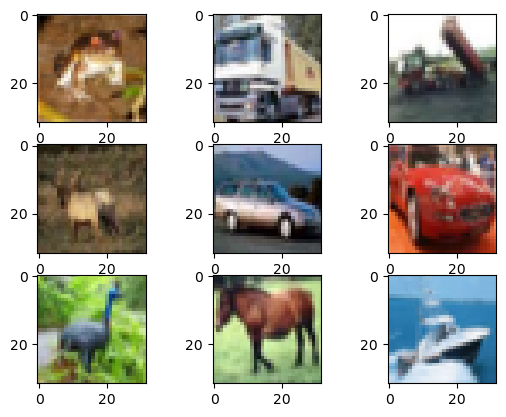

In [4]:
#view few images 
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

In [5]:
X_train = (X_train.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.

In [6]:
# Print a few y_train values to see before and after categorical
print(y_train[0])
print(y_train[1])
print(y_train[10])


[6]
[9]
[4]


In [7]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


print(y_train_cat[0])
print(y_train_cat[1])
print(y_train_cat[10])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
#Define Model with BatchNormalization and Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [9]:
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [10]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
#filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
#filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/best_model.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
#log_csv = CSVLogger('/content/drive/MyDrive/Colab Notebooks/saved_logs/my_logs.csv', separator=',', append=False)

callbacks_list = [early_stop]


#########################################################
#Fit model....

history = model.fit(X_train, y_train_cat, 
                    epochs=5, batch_size=64, 
                    validation_data=(X_test, y_test_cat), 
                    verbose=1, callbacks=callbacks_list)


_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy = ", (acc * 100.0), "%")

Epoch 1/5
782/782 [==============================] - 256s 325ms/step - loss: 1.6032 - accuracy: 0.4234 - val_loss: 1.3315 - val_accuracy: 0.5083
Epoch 2/5
782/782 [==============================] - 230s 294ms/step - loss: 1.2020 - accuracy: 0.5685 - val_loss: 1.0314 - val_accuracy: 0.6292
Epoch 3/5
782/782 [==============================] - 200s 256ms/step - loss: 1.0235 - accuracy: 0.6383 - val_loss: 0.9741 - val_accuracy: 0.6589
Epoch 4/5
782/782 [==============================] - 205s 263ms/step - loss: 0.9138 - accuracy: 0.6788 - val_loss: 0.9051 - val_accuracy: 0.6794
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 0.8775 - accuracy: 0.6948
Accuracy =  69.48000192642212 %


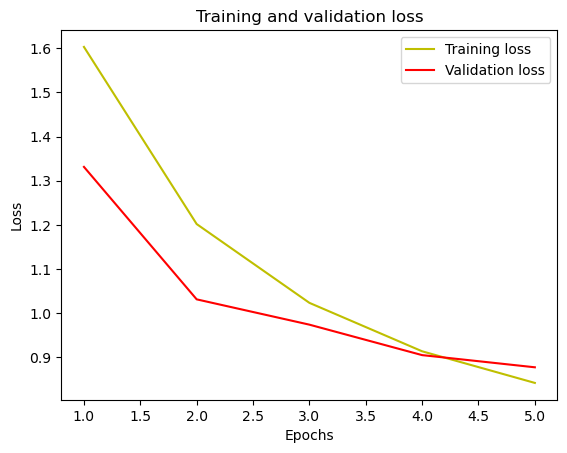

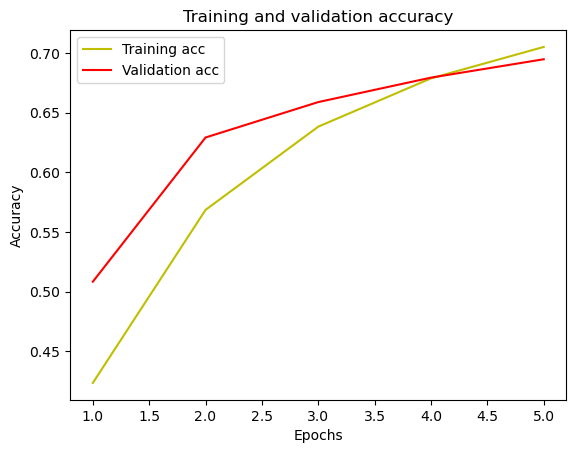

In [12]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
############################################
#Save keras model for future use

model.save('cifar_model_5epochs.h5') 



In [2]:
#Load The saved model 
from tensorflow.keras.models import load_model
path='C:/Users/paltu/anaconda_copy/cifar_model_5epochs.h5'
loaded_keras_model = load_model(path)


In [8]:
# #Inference using the saved keras model. 
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
ground_truth= np.argmax(y_test_cat[test_img_number], axis=None)
prediction = loaded_keras_model.predict(test_img_input)
print(prediction)

1/1 [==============================] - 0s 272ms/step
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.5243912e-20]]


Original class is: deer
Predicted class is: automobile


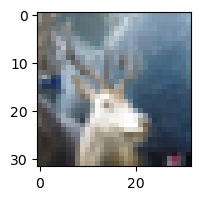

In [9]:
predicted_class = np.argmax(prediction, axis=None)

plt.figure(figsize=(2, 2))
plt.imshow(test_img)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
original_label=classes[ground_truth]
prediction_label=classes[predicted_class]

print("Original class is:", original_label)
print("Predicted class is:", prediction_label)

In [11]:
##########################################################################
#Save keras model as ONNX
##################################################
import onnx
import os
#os.environ['TF_KERAS'] = '1'
import tf2onnx #keras2onnx, 

#Load The saved model 
from tensorflow.keras.models import load_model
loaded_keras_model = load_model('cifar_model_5epochs.h5')

onnx_model, _ = tf2onnx.convert.from_keras(loaded_keras_model)

onnx.save(onnx_model, 'cifar10_onnx_50epochs.onnx')


In [14]:
################################
#Inference using ONNX (and keras for comparison)

import onnxruntime

session = onnxruntime.InferenceSession("cifar10_onnx_50epochs.onnx")
session.get_inputs()[0].shape
session.get_inputs()[0].type


input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name


test_img_number_onnx = random.randint(0, len(X_test))
test_img_onnx = X_test[test_img_number_onnx]

test_img_input_onnx=np.expand_dims(test_img_onnx, 0)
ground_truth_onnx = np.argmax(y_test_cat[test_img_number_onnx], axis=None)

result = session.run([output_name], {input_name: test_img_input_onnx})
predicted_class_onnx = np.argmax(result, axis=None)

InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Unexpected input data type. Actual: (tensor(uint8)) , expected: (tensor(float))

In [36]:
import onnxruntime
import numpy as np
import random

# Load the ONNX model
session = onnxruntime.InferenceSession("cifar10_onnx_50epochs.onnx")

# Get input and output information
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Select a random test image
test_img_number_onnx = random.randint(0, len(X_test) - 1)  # Adjusted to ensure it's within the valid range
test_img_onnx = X_test[test_img_number_onnx]

# Prepare the input image
test_img_input_onnx = np.expand_dims(test_img_onnx, 0).astype(np.float32) / 255.0  # Convert to float and normalize

# Get the ground truth label
ground_truth_onnx = np.argmax(y_test_cat[test_img_number_onnx])

# Run inference
result = session.run([output_name], {input_name: test_img_input_onnx})
predicted_class_onnx = np.argmax(result[0])  # Retrieve the result from the list and find the index of the maximum value


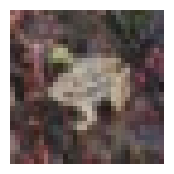

In [37]:
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(test_img_onnx)


In [38]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
original_label_onnx=classes[ground_truth_onnx]
prediction_label_onnx=classes[predicted_class_onnx]

In [39]:
#Prediction using keras model
prediction_keras = loaded_keras_model.predict(test_img_input_onnx)
predicted_class_keras = np.argmax(prediction_keras, axis=None)
prediction_label_keras=classes[predicted_class_keras]

print("_________________________________________________")
print("Original class is:", original_label_onnx)
print("Predicted class using ONNX is:", prediction_label_onnx)
print("Predicted class using Keras is:", prediction_label_keras)
print("_________________________________________________")
print("Predicted probabilities for all classes using ONNX is:", result[0])
print("____________________________________")
print("Predicted probabilities for all classes using Keras is:", prediction_keras)

1/1 [==============================] - 0s 19ms/step
_________________________________________________
Original class is: frog
Predicted class using ONNX is: frog
Predicted class using Keras is: frog
_________________________________________________
Predicted probabilities for all classes using ONNX is: [[1.1899507e-07 6.7141963e-07 5.6322356e-04 2.4999640e-04 1.0503167e-03
  2.4964820e-05 9.9810922e-01 4.0249947e-07 3.3133657e-07 7.9798855e-07]]
____________________________________
Predicted probabilities for all classes using Keras is: [[1.1899507e-07 6.7141968e-07 5.6322385e-04 2.4999664e-04 1.0503182e-03
  2.4964844e-05 9.9810922e-01 4.0249984e-07 3.3133719e-07 7.9798934e-07]]
